# Piyush Kumar Gaurav
# Roll No. 20104442
# Assignment - 4

Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt
import random


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

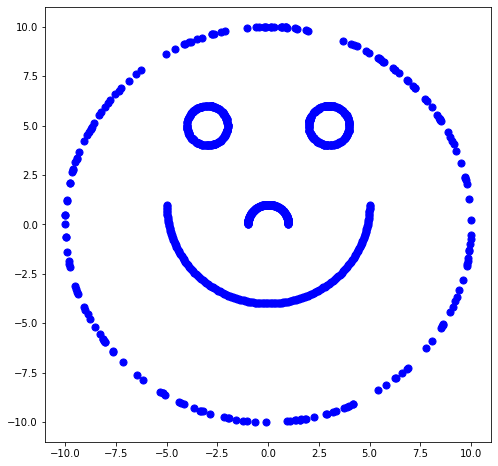

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


# Solution 1 (Some custom function)

In [7]:
def plot_clusters(k,clust_assign, X, mu_mat):
    ''' 
    This fn plots cluster data and assigns different colors to each cluster as per cluster assignment array. 
    The function hand;es atmost 13 clusters
    input: X -> np array of data, size = no. of data x no. of dimension
           k -> int, no. of clusters
           clust_assign -> np array of int, length = no. of data - contains cluster assignment index
           mu_mat -> np array, cluster mean vectors of size no. of clusters("k") x no. of dimension
    output: No output - Just plots the cluster data
    '''
    colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    if k > len(colors):
        print("This function plots for maximum", len(colors), "number of clusters")
    else:
        for i in range(k):
                indices = np.where(clust_assign == i)
                X_sub = X[indices[0], :]
                plt.scatter(X_sub[:,0], X_sub[:,1], c=colors[i])
    plt.scatter(mu_mat[:,0], mu_mat[:,1], s=200, marker='*', linewidths=4, c='black')
    plt.show()

def plot_clusters_plus2(k,clust_assign, X, mu_mat, mu_init):
    ''' 
    This fn plots cluster data and assigns different colors to each cluster as per cluster assignment array. 
    The function hand;es atmost 13 clusters. The function is quite similar to prev. one "plot_clusters".
    This is a redundant fn which aditionall plots one mere set of mu vectors
    input: X -> np array of data, size = no. of data x no. of dimension
           k -> int, no. of clusters
           clust_assign -> np array of int, length = no. of data - contains cluster assignment index
           mu_mat -> np array, cluster mean vectors of size no. of clusters("k") x no. of dimension
           mu_init -> np array, initialized set of cluster mean vectors of size no. of clusters("k") x no. of dimension
    output: No output - Just plots the cluster data
    '''
    colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    if k > len(colors):
        print("This function plots for maximum", len(colors), "number of clusters")
    else:
        for i in range(k):
                indices = np.where(clust_assign == i)
                X_sub = X[indices[0], :]
                plt.scatter(X_sub[:,0], X_sub[:,1], c=colors[i])
    plt.scatter(mu_mat[:,0], mu_mat[:,1], s=200, marker='*', linewidths=4, c='black')
    plt.scatter(mu_init[:,0], mu_init[:,1], s=200, marker='+', linewidths=4, c='blue')
    plt.show()

def kmean_algo(X,k,mu_init,n_iter=50):
    ''' 
    This fn implements the trivial k-means algorithm
    
    input: X -> np array of data, size = no. of data x no. of dimension
           k -> int, no. of clusters
           mu_init -> np array, initialized mu vectors of size "k" x no. of dimension
           n_iter -> int, no of iteration
    output: mu_mat -> np array, cluster mean vectors of size no. of clusters("k") x no. of dimension
            clust_assign -> np array of int, length = no. of data - contains cluster assignment index
    '''
    n_data = X.shape[0]
    dim = X.shape[1]
    distance_mat = np.zeros((n_data,k))
    mu_mat = np.copy(mu_init)
    clust_assign_new = np.zeros((n_data,), dtype=int)
    for it in range(n_iter):
        # This for loop computes distance matrix of size(No. of datapoint x no. of cluster)
        # distance_mat contains eucl dist of each data (X) from each cluster mean ()mu_mat
        for i in range(k):
            distance_mat[:,i] = np.linalg.norm(X-mu_mat[i,:], axis=1)
        clust_assign = np.argmin(distance_mat, axis=1) # Cluster assignment
        # This for loop updates cluster means 
        for i in range(k):
            indices = np.where(clust_assign == i)
            X_sub = X[indices[0], :]
            mu_mat[i,:] = np.mean(X_sub, axis=0)
        diff = abs(clust_assign - clust_assign_new)
        if np.sum(diff) < 1:
            break
        clust_assign_new = np.copy(clust_assign)
    return mu_mat, clust_assign

def plot_clusters(k,clust_assign, X, mu_mat):
    ''' 
    This fn plots cluster data and assigns different colors to each cluster as per cluster assignment array. 
    The function handles atmost 13 clusters
    input: X -> np array of data, size = no. of data x no. of dimension
           k -> int, no. of clusters
           clust_assign -> np array of int, length = no. of data - contains cluster assignment index
           mu_mat -> np array, cluster mean vectors of size no. of clusters("k") x no. of dimension
    output: No output - Just plots the cluster data
    '''
    colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    if k > len(colors):
        print("This function plots for maximum", len(colors), "number of clusters")
    else:
        for i in range(k):
                indices = np.where(clust_assign == i)
                X_sub = X[indices[0], :]
                plt.scatter(X_sub[:,0], X_sub[:,1], c=colors[i])
    plt.scatter(mu_mat[:,0], mu_mat[:,1], s=200, marker='*', linewidths=4, c='black')
    plt.show()

def pick_a_number_based_on_mag(A):
    ''' 
    This fn selects outputs index based on magnitude of element of A. Note that the probability to select 
    high magnitude no. is high, but it wont necesarily select a high mag no. This function will be used in 
    better initialization of k means++ algo cluster means.
    input: A -> 1-D np array of float 
    output: selected_random_number - int, index of randomly chosen (based on mag.) no. from list "A"
    '''
    weights1=[]
    for i in A:
        weights1.append(i/sum(A))
    selected_random_number = random.choices(A,weights=weights1,k=1)    
    return selected_random_number

def init_kmeanplus2(k,X):
    ''' 
    This fn selects outputs index based on magnitude of element of A. Note that the probability to select 
    high magnitude no. is high, but it wont necesarily select a high mag no. This function will be used in 
    better initialization of k means++ algo cluster means.
    input: k -> int, no, of cluster
           X -> np array of data, size = no. of data x no. of dimension
    output: mu_init - np array, initialized set of cluster mean vectors of size no. of clusters("k") x no. of dimension
    '''
    n_data = X.shape[0]
    dim = X.shape[1]
    mu_init = np.zeros((k,dim))
    distance_mat = np.zeros((X.shape[0],k))
    
    r_ind = np.random.randint(n_data)
    mu_init[0,:] = X[r_ind,:]
    distance_mat[:,0] = np.linalg.norm(X-mu_init[0,:], axis=1)
    distance_mat = np.round(distance_mat*100000)/100000
    lst = np.sum(distance_mat, axis=1)
    for i in range(1,k):
        ind = np.where(lst == pick_a_number_based_on_mag(lst))
        mu_init[i,:] = X[ind[0][0],:]
        distance_mat[:,i] = np.linalg.norm(X-mu_init[i,:], axis=1)
        distance_mat = np.round(distance_mat*100000)/100000        
        lst = np.sum(distance_mat, axis=1)    
    return mu_init

def find_AIC(X, mu_mat, clust_assign):
    ''' 
    This fn two types of loss functions for clustering problem:
    1) Normal eucledian loss (Loss)
    2) AIC (Akaike Information Criteria)
    input: X -> np array of data, size = no. of data x no. of dimension
           clust_assign -> np array of int, length = no. of data - contains cluster assignment index
           mu_mat -> np array, cluster mean vectors of size no. of clusters("k") x no. of dimension

    output: Loss, - float, Normal eucledian loss (Loss)
            Loss_AIC  - float, AIC (Akaike Information Criteria)
    '''
    k = mu_mat.shape[0]
    D = mu_mat.shape[1]
    Loss = 0.0
    for i in range(k):
        indices = np.where(clust_assign == i)
        X_sub = X[indices[0], :]
        Loss += np.sum(np.linalg.norm(X_sub-mu_mat[i,:], axis=1))
    Loss_AIC = 2*Loss + k*D
    return Loss, Loss_AIC

# Solution 1a

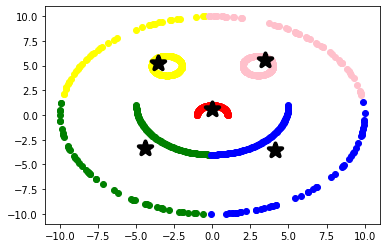

In [29]:
################################# K-MEANS CLUSTERING #################################
n_data = X.shape[0]
dim = X.shape[1]
k = 5
# Initialize Cluster mean randomly
mu_init = np.random.uniform(low=-10, high=10, size=(k*dim,))
mu_init = np.reshape(mu_init, (k,dim))
#Implement k means clustering
mu_mat, clust_assign = kmean_algo(X,k,mu_init,n_iter=50)
# Plots clustered data 
# 1) Different colors for different cluster assignments
# 2) Black stars are Cluster means
plot_clusters(k,clust_assign, X, mu_mat)

# Solution 1b

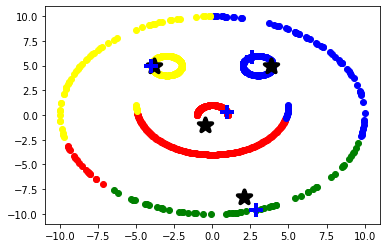

In [34]:
################################# K-MEANS++ CLUSTERING #################################
n_data = X.shape[0]
dim = X.shape[1]
k = 4
# Initialize Cluster mean through kmeans++ (The large blue "+")
# Note that they are one among the data and "usually" at large distance among each other
mu_init = init_kmeanplus2(k,X)
#Implement k means clustering
mu_mat, clust_assign = kmean_algo(X,k,mu_init,n_iter=50)
# Plots clustered data 
# 1) Different colors for different cluster assignments
# 2) Black stars are final Cluster means
# 3) The large blue "+" are the initialized Cluster mean through kmeans++ 
plot_clusters_plus2(k,clust_assign, X, mu_mat, mu_init)

# Solution 1c

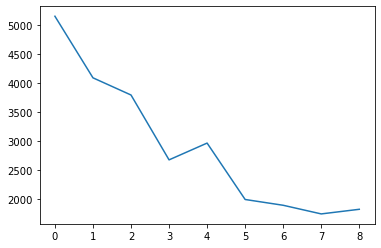

In [35]:
################################# OPTIMAL K using Loss fn. elbow point #################################
n_data = X.shape[0]
dim = X.shape[1]
Loss_lst = []
for k in range (1,10):
    mu_init = np.random.uniform(low=-10, high=10, size=(k*dim,))
    mu_init = np.reshape(mu_init, (k,dim))
    mu_mat, clust_assign = kmean_algo(X,k,mu_init,n_iter=50)
    Loss, Loss_AIC = find_AIC(X, mu_mat, clust_assign)
    Loss_lst.append(Loss)
    
plt.plot(Loss_lst)

In [36]:
print("The no. of clusters of about 5 lies at the elbow point. Hence that is the optimal no. of Clusters for this data")
print("NOT SO HAPPY with the performance of kmeans or kmeans++")

The no. of clusters of about 5 lies at the elbow point. Hence that is the optimal no. of Clusters for this data
NOT SO HAPPY with the performance of kmeans or kmeans++


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

# Solution 1d

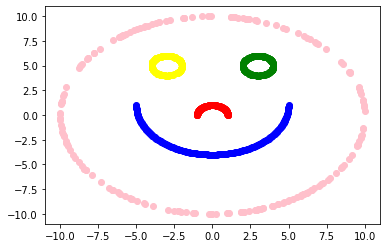

Note: Different colors represent different Clusters. 
 
Usually Kernelized k mean correctly classify different features most of the time, but obviously depend on initialization
Try executing a few times if it doesnt show right result for a particular initialization 
 


In [707]:
def plot_clusters_kern(k,clust_assign, X):
    ''' 
    This fn plots cluster data and assigns different colors to each cluster as per cluster assignment array. 
    The function handles atmost 13 clusters
    input: X -> np array of data, size = no. of data x no. of dimension
           k -> int, no. of clusters
           clust_assign -> np array of int, length = no. of data - contains cluster assignment index
    output: No output - Just plots the cluster data
    '''
    colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    if k > len(colors):
        print("This function plots for maximum", len(colors), "number of clusters")
    else:
        for i in range(k):
                indices = np.where(clust_assign == i)
                X_sub = X[indices[0], :]
                plt.scatter(X_sub[:,0], X_sub[:,1], c=colors[i])
    plt.show()
    
def gauss_kernel_all(var, X, mu):
    ''' 
    This fn outputs a RBF gaussian kernel for 
    input: var -> float, variance for the RBF Gaussian kernel
           X -> np array of data, size = no. of data x no. of dimension
           mu -> 1D np array of mean, just 1 mean vector
    output: gauss_k - 1D np array of each datapoint w.r.t mean
    '''
    diff_norm = lin.norm(X-mu, axis=1)
    gauss_k = np.exp(-diff_norm/2*var*var)
    return gauss_k

def find_dist_matform(X, mu_mat):
    ''' 
    This fn finds distance of all vectors (rows) of X w.r.t. all the vectors(row) in mu_mat
    input: X -> np array of data, size = no. of data x no. of dimension
           mu_mat -> np array, cluster mean vectors of size no. of clusters("k") x no. of dimension
                   In general can be different matrix just matching dimension with X
    output: Dist_mat - 2D np array of size (X.shape[0] x mu_mat.shape[0]) and computes all possible distance combination
    '''
    X_norm = np.square( lin.norm(X, axis=1))
    mu_mat_norm = np.square( lin.norm(mu_mat, axis=1))
    Dist_mat = X_norm[:,np.newaxis] + mu_mat_norm - 2 * X.dot(mu_mat.T)
    return Dist_mat

def make_Gram_mat(Data1, Data2, sigma):
    ''' 
    This fn finds distance of all vectors (rows) of X w.r.t. all the vectors(row) in mu_mat
    input: Data1 -> np array of data, size = no. of data x no. of dimension
           Data2 -> np array of data, size = no. of data x no. of dimension
           sigma -> float, variance of RBF Kernel
    output: Gram_mat - 2D np array of size (Data1.shape[0] x Data1.shape[0]) and computes all possible distance combination
    '''
    nfac = -1/(2*sigma*sigma)
    Gram_mat = np.exp(nfac * find_dist_matform(Data1,Data2))
    return Gram_mat

def assign_cluster(Gram_mat,mu_mat):
    ''' 
    This fn finds distance of all vectors (rows) of X w.r.t. all the vectors(row) in mu_mat and then assigns
    closest cluster mean
    input: Gram_mat -> np array of data, size = no. of data x no. of data (high dimension transformed data)
           mu_mat -> np array of data, size = no. of cluster x no. of data (high dimension transformed means)
    output: cluster_assign - 1D np array of size no. of data and have closest cluster index 
    '''
    k = mu_mat.shape[0]
    n = Gram_mat.shape[0]
    Dist = np.zeros( (k,) )
    for i in range( k ):
        mu = mu_mat[i,:]
        Dist[i] = mu.dot(Gram_mat.dot(mu))
    D = np.zeros( (k, n) )
    D = D + np.diag(Gram_mat) - 2*np.matmul(mu_mat,Gram_mat) + Dist[:, np.newaxis]
    cluster_assign = np.argmin( D, axis = 0 )
    return cluster_assign

def initialize_kmeanplus2(Gram_mat,k):
    '''
    This fn initializes cluster means based on high prob. to large distance. Note that the probability to select 
    high magnitude no. is high, but it wont necesarily select a high mag no.
    input: k -> int, no, of cluster
           Gram_mat -> np array of data, size = no. of data x no. of data - Gram matrix (i.e. in high dim)
    output: mu_init - np array, initialized set of cluster mean vectors of size no. of clusters("k") x no. of dimension
    '''
    n = Gram_mat.shape[0]
    index = np.zeros((k,), dtype = int)
    norms = np.diag(Gram_mat)
    # Distance in kernelized form
    D = -2 * Gram_mat + norms + norms[:, np.newaxis]
    index[0] = random.randint( 0, n-1 )
    for t in range( 1, k ):
        dist = np.min( D[:, index[0:t]], axis = 1 )
        probs = dist/np.sum(dist)
        probs[probs < 1e-12] = 0
        index[t] = np.random.choice( np.arange( n ), p = probs )
    mu_init = np.zeros( (k, n) )
    mu_init[ np.arange(k), index ] = 1
    mu_init / np.sum( mu_init, axis = 1 )[:,np.newaxis]
    return mu_init

def upd_clust_mean(Gram_mat, clust_assign, k, mu_mat_old ):
    '''
    This fn outputs updates the cluster mean based on clust_assign.
    input: Gram_mat -> np array of data, size = no. of data x no. of data - Gram matrix (i.e. in high dim)
           clust_assign - 1D np array of size no. of data and have closest cluster index 
           k -> int, no, of cluster
           mu_mat_old -> np array, old set of cluster mean vectors of size no. of clusters("k") x no. of dimension
    output: mu_mat - np array, updated set of cluster mean vectors of size no. of clusters("k") x no. of dimension
            converged -> True/False - whether converged or not info
    '''
    mu_mat = np.zeros( (k, Gram_mat.shape[0]) )
    for i in range( k ):
        if clust_assign[clust_assign == i].size > 0:
            mu_mat[i, clust_assign == i] = 1
            mu_mat[i,:] = mu_mat[i,:]/np.sum( mu_mat[i,:] )
        else:
            print( "Warning: No cluster found in a few case" )
            mu_mat[i,:] = mu_mat_old[i,:]
    if lin.norm( mu_mat - mu_mat_old, "fro" ) < 1e-15:
        converged = True
    else:
        converged = False
    return (mu_mat, converged)

def kern_kmean_algo( Gram_mat, k, mu_init, n_iter):
    '''
    This fn implements normal k means clustering and thus primarily does 2 jobs 
    1) Assigns cluster to data point
    2) Update cluster means
    input: Gram_mat -> np array of data, size = no. of data x no. of data - Gram matrix (i.e. in high dim)
           k -> int, no, of cluster
           mu_init -> np array, initial set of cluster mean vectors of size no. of clusters("k") x no. of dimension
           n_iter -> int, no. of iteration
    output: mu_mat - np array, updated set of cluster mean vectors of size no. of clusters("k") x no. of dimension
            converged -> True/False - whether converged or not info
    '''
    for t in range( n_iter ):        
        clust_assign = assign_cluster( Gram_mat, mu_init )
        mu_init, conv = upd_clust_mean( Gram_mat, clust_assign, k, mu_init )
        if conv:
            return (mu_init, clust_assign)
    return mu_init, clust_assign


################################# Kernelized K means clustering #################################

n_data = X.shape[0]
dim = X.shape[1]
k = 5
sigma=3.
Y = make_Gram_mat(X, X, sigma)
mu_init = initialize_kmeanplus2( Y, k )
mu_mat, clust_assign = kern_kmean_algo( Y, k, mu_init, n_iter=50 )
plot_clusters_kern(k,clust_assign, X)
print("Note: Different colors represent different Clusters. \n ")
print("Usually Kernelized k mean correctly classify different features most of the time, but obviously depend on initialization")
print("Try executing a few times if it doesnt show right result for a particular initialization \n ")

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

# Solution 2a:

<font size="4">

## Goal:
To derive E-step and M-step in the EM Algorithm, that would work for a GMM where mixture weights $\pi_k$ are known and covariance ($\Sigma_k$) are restricted to be spherical (i.e $\Sigma_k = \sigma_k^2 I_k$)
    
## Approach:
We assume to have 'k' number of clusters and each of these clusters are represented by a gaussian distribution - $\mathcal{N}(\mu_k, \Sigma_k)$ where $\Sigma_k = \sigma_k^2 I_k$
    
Let $\Delta \equiv \{ \mu_k, \Sigma_k\}_{k=1}^{K}$ be the unknown variables and $\pi \equiv \{ \pi_k\}_{k=1}^{K}$ be the known variables.
    
To derive the steps required in the EM algorithm, we need an expression for log likelihood. The total log likelihood (for whole dataset) can be expressed as:
    
\begin{equation}
     L = p(X | \Delta, \pi) = \sum_{n=1}^{N} log \sum_{k=1}^{K} \pi_k \mathcal{N}(\mu_k, \Sigma_k)\\
    \label{eq:Likelihood1} \tag{1}
\end{equation} 
    
Since it is difficult to evaluate summation inside a log, we do some algebraic manipulation to bring it in a friendly form. 
    
We multiply and divide expression $\eqref{eq:Likelihood1}$ inside summation over $k$ by a new variable $q_{nk}$ such that $q_{nk}$ is a positive fraction and satisfies $\sum_{k=1}^{K} q_{nk} = 1$. Thus we get the equation 
\begin{equation}
     L = p(X | \Delta, \pi) = \sum_{n=1}^{N} log \sum_{k=1}^{K} \pi_k \mathcal{N}(\mu_k, \Sigma_k) \frac{q_{nk}}{q_{nk}}\\
    = \sum_{n=1}^{N} log \sum_{k=1}^{K} q_{nk} \frac{\pi_k \mathcal{N}(\mu_k, \Sigma_k)}{q_{nk}}\\
    \label{eq:Likelihood2} \tag{2}
\end{equation} 
    
    
    
    
Now to derive the lower bound of Total log likelihood $\eqref{eq:Likelihood2}$ Jensen's inequality can be used.
    
As per Jensen's inequality, 
    
$$ log (\mathbb{E}_{p(z)} [f(z)]) \geq \mathbb{E}_{p(z)} [log( f (z))] $$
    
Writing the Likelihood equation in a form similar to Jensen's in equality:
    
\begin{equation}
     L = \sum_{n=1}^{N} log \left( \mathbb{E}_{q_{nk}} \left[ \frac{\pi_k \mathcal{N}(\mu_k, \Sigma_k)}{q_{nk}} \right] \right) \\
    \label{eq:Likelihood3} \tag{3}
\end{equation} 
 
Thus using the Jensen's inequality in $\eqref{eq:Likelihood3}$ we can utilize the lower bound of L, 
    
\begin{equation}
     L = \sum_{n=1}^{N} log \left( \mathbb{E}_{q_{nk}} \left[ \frac{\pi_k \mathcal{N}(\mu_k, \Sigma_k)}{q_{nk}} \right] \right) \geq \sum_{n=1}^{N} \mathbb{E}_{q_{nk}} \left[ log \left(  \frac{\pi_k \mathcal{N}(\mu_k, \Sigma_k)}{q_{nk}}  \right) \right] \\
    \geq \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk} \left[ log \left(  \frac{\pi_k \mathcal{N}(\mu_k, \Sigma_k)}{q_{nk}}  \right) \right] \\
    \label{eq:Likelihood4} \tag{4}
\end{equation} 
    

Lets denote this lower Bound by $B$, Thus we get,

\begin{equation}
     B =  \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk} log(\pi_k ) + \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk}  log \left(   \mathcal{N}(\mu_k, \Sigma_k) \right) + \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk} log(q_{nk})\\
    \label{eq:Likelihood5} \tag{5}
\end{equation} 
    
    
The RHS of equation $\eqref{eq:Likelihood5}$, can now be differentiated w.r.t $q_{nk}$, $\mu_k$, and $\Sigma_k $ (not $\pi_k$ as it is known) and set to zero to find the values corresponding to maxima of MLE.
    
### Part 1: Differentiating $B$ w.r.t $\mu_k$
    
From $\eqref{eq:Likelihood5}$, We get, 
\begin{equation}
     \frac{\partial B}{\partial \mu_k} = -\frac{1}{2} \sum_{n=1}^{N} q_{nk} \times \frac{\partial (x_n - \mu_k)^T \Sigma_k^{-1} (x_n - \mu_k)}{\partial (x_n - \mu_k)} \times \frac{\partial (x_n - \mu_k}{\partial \mu_k}  \\
    = \sum_{n=1}^{N} q_{nk} \Sigma_k^{-1} (x_n - \mu_k)\\
    \label{eq:mu1} \tag{6}
\end{equation}

In order to find $\mu_k$ at maxima, we equate $\eqref{eq:mu1}$ to zero and rearranging gives us an expression for $\mu_k$
\begin{equation}
     \mu_k = \frac{\sum_{n=1}^{N} q_{nk} x_n}{\sum_{n=1}^{N} q_{nk}}
    \label{eq:mu2} \tag{7}
\end{equation} 
    

### Part 2: Differentiating $B$ w.r.t $\Sigma_k$
    
From $\eqref{eq:Likelihood5}$, We get, 
    
\begin{equation}
     B \propto  -\frac{1}{2} \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk} log((2 \pi)^d |\Sigma_k|) -  \frac{1}{2} \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk} (x_n - \mu_k)^T \Sigma_k^{-1} (x_n - \mu_k) \\
    \label{eq:Bound_sigma1} \tag{8}
\end{equation}    
    
Ignoring the constant $2\pi$ from the first term we get, 

\begin{equation}
     B \propto  -\frac{1}{2} \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk} log(|\Sigma_k|) -  \frac{1}{2} \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk} (x_n - \mu_k)^T \Sigma_k^{-1} (x_n - \mu_k) \\
    \label{eq:Bound_sigma2} \tag{9}
\end{equation}   

We take partial derivative of equation  $\eqref{eq:Bound_sigma2}$ w.r.t. $\Sigma_k$ and also utilize following identities:
    
$$ \frac{\partial log|C|}{\partial C} = (C^T)^{-1} \quad and \quad \frac{\partial a^T C^{-1} b}{\partial C} = -(C^T)^{-1} a b^T (C^T)^{-1}$$
    
Hence we get, 
    
\begin{equation}
     \frac{\partial B}{\partial \Sigma_k} = -\frac{1}{2} \sum_{n=1}^{N} q_{nk} |\Sigma_k|^{-1} +  \frac{1}{2} \sum_{n=1}^{N} q_{nk} \Sigma_k^{-1} (x_n - \mu_k) (x_n - \mu_k)^T \Sigma_k^{-1}\\
    \label{eq:Bound_sigma3} \tag{10}
\end{equation}      
    
Simplifying $\eqref{eq:Bound_sigma3}$ (and skipping simple algebraic steps )and equating to zero we get, 
    
\begin{equation}
     \Sigma_k = \frac{\sum_{n=1}^{N} q_{nk} (x_n - \mu_k) (x_n - \mu_k)^T }{\sum_{n=1}^{N} q_{nk}}\\
    \label{eq:Sigma1} \tag{11}
\end{equation}   
    
Remembering the circular covariance condition we simply can write:
    
\begin{equation}
     \sigma_k^{2} = \frac{\sum_{n=1}^{N} q_{nk} (x_n - \mu_k)^T (x_n - \mu_k) }{\sum_{n=1}^{N} q_{nk}}\\
    \label{eq:Sigma2} \tag{12}
\end{equation}  
 
    
### Part 3: Deriving update equation for $q_{nk}$ w.r.t $\Sigma_k$
    
$q_{nk}$ appears in all the three terms in equation $\eqref{eq:Likelihood5}$ along with the constraint that $\sum_{k=1}^{K} q_{nk} = 1$. Hence we can form a lagrangian equation utilizing these two equations:
    
\begin{equation}
     B =  \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk} log(\pi_k ) + \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk}  log \left(   \mathcal{N}(\mu_k, \Sigma_k) \right) + \sum_{n=1}^{N} \sum_{k=1}^{K} q_{nk} log(q_{nk}) + \lambda (\sum_{k=1}^{K} q_{nk} - 1)\\
    \label{eq:Bound_q1} \tag{13}
\end{equation}  
    
    
Taking partial derivative of $B$ with respect to $q_{nk}$ gives
\begin{equation}
     B = log(\pi_k) + log(\mathcal{N}(x_n | \mu_k , \Sigma_k ) − (1 + log(q_{nk}) ) − \lambda\\
    \label{eq:Bound_q2} \tag{14}
\end{equation} 
    
Setting to zero, rearranging and exponentiating gives us an expression for $q_{nk}$ :
$$ 1 + log (q_{nk} + \lambda = log(\pi_k) + log (\mathcal{N} (x_n | \mu_k , \Sigma_k )$$
$$ exp(log (q_{nk}) + (\lambda + 1)) = exp(log(\pi_k) + log(\mathcal{N}(x_n | \mu_k ,\Sigma_k))$$
\begin{equation}
    q_{nk} exp(\lambda + 1) = \pi_k \mathcal{N}(x_n | \mu_k , \Sigma_k)
    \label{eq:Bound_q3} \tag{15}
\end{equation}  
    
    
We need to find the constant term $exp(\lambda + 1)$, we sum both sides over k:

$$exp(\lambda + 1) \sum_{k=1}^{K} q_{nk}  = \sum_{k=1}^{K} \pi_{k} \mathcal{N}(x_n | \mu_k , \Sigma_k )$$
    
$$exp(\lambda + 1)  = \sum_{k=1}^{K} \pi_{k} \mathcal{N}(x_n | \mu_k , \Sigma_k )$$
   
Substituting above in Eq. $\eqref{eq:Bound_q3}$, we have
\begin{equation}
    q_{nk}  = \frac{\pi_k \mathcal{N}(x_n | \mu_k , \Sigma_k)} {\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_k , \Sigma_k)}
    \label{eq:q1} \tag{16}
\end{equation}     
    
    
Thus from Eq. $\eqref{eq:mu2}$ , $\eqref{eq:Sigma2}$  and $\eqref{eq:q1}$ We get our 
    
### Maximization step as:
    
\begin{equation}
     \mu_k = \frac{\sum_{n=1}^{N} q_{nk} x_n}{\sum_{n=1}^{N} q_{nk}}
    \label{eq:M1} \tag{17}
\end{equation} 
    
\begin{equation}
     \sigma_k^{2} = \frac{\sum_{n=1}^{N} q_{nk} (x_n - \mu_k)^T (x_n - \mu_k) }{\sum_{n=1}^{N} q_{nk}}\\
    \label{eq:M2} \tag{18}
\end{equation} 
    
### Expectation step as:
    
\begin{equation}
    q_{nk}  = \frac{\pi_k \mathcal{N}(x_n | \mu_k , \Sigma_k)} {\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_k , \Sigma_k)}
    \label{eq:E1} \tag{19}
\end{equation} 
    
    
</font>

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

# Solution 2b

### The Maximization and Expectation step derived via equation (17), (18) and (19) are coded below and its corectness is demonstrated

In [722]:
from scipy.stats import multivariate_normal # for computing gaussian pdf value


def generate_2d_gaussdata(k, mean_vec, sigma_vec, num_vec):
    '''
    This fn generates 2D gaussian data for given "k" (no. of cluster), "mean_vec", "sigma_vec", "num_vec"
    
    input: k -> int, no, of cluster
           mean_vec -> 2D np array, cluster mean vectors of size no. of clusters("k") x no. of dimension (=2)
           sigma_vec -> 1D np array, variance for each cluster size, length = no. of clusters("k")
           num_vec -> 1D np array int, no. of data to be generated for each cluster
    output: X - 2D np array, Synthetic data points of array size == total no. of data point x no. of dim (=2)
    '''
    dim = mean_vec.shape[1]
    X = np.random.normal(mean_vec[0,:], sigma_vec[0], (num_vec[0],dim))
    for i in range(1,k):
        New = np.random.normal(mean_vec[i,:], sigma_vec[i], (num_vec[i],dim))
        X = np.concatenate((X,New), axis=0)
    return X

def mu_update(q_mat, X):
    '''
    This fn update mean of each gaussian cluster as per Equation 17 in Solution 2a
    This fn is a part of MAXIMIZATION STEP in E-M algo.
    
    input: q_mat -> 2D np array (float), Membership value (fraction) for each data point for the cluster
                    q_mat.shape = no. of datapoints(N) x no. of clusters("k")
           X -> 2D np array, Synthetic data points of array size == total no. of data point x no. of dim (=2)
    output: mu_mat -> 2D np array, updated cluster mean array of size == no. of clusters("k") x no. of dim (=2)
    '''
    n_data = q_mat.shape[0]
    n_cluster = q_mat.shape[1]
    dim = X.shape[1]
    mu_mat = np.zeros((n_cluster, dim))
    for i in range(n_cluster):
        Num = np.sum((q_mat[:,i]*X.T).T, axis=0)
        Den = np.sum(q_mat[:,i])
        mu_mat[i,:] = Num / Den
    return mu_mat

def sig_square_update(q_mat, mu_mat, X):
    '''
    This fn update variance of each gaussian cluster as per Equation 18 in Solution 2a. 
    This fn is a part of MAXIMIZATION STEP in E-M algo.
    
    input: q_mat -> 2D np array (float), Membership value (fraction) for each data point for the cluster
                    q_mat.shape = no. of datapoints(N) x no. of clusters("k")
           mu_mat -> 2D np array, cluster mean array of size == no. of clusters("k") x no. of dim (=2)
           X -> 2D np array, Synthetic data points of array size == total no. of data point x no. of dim (=2)
    output: sig_arr -> 1D np array, updated cluster variance array of length == no. of clusters("k") 
    '''
    n_data = q_mat.shape[0]
    n_cluster = q_mat.shape[1]
    dim = X.shape[1]
    sig_arr = np.zeros(n_cluster)
    for i in range(n_cluster):
        Num = np.sum(np.sum((X-mu_mat[i,:]) * (X-mu_mat[i,:]), axis = 1) * q_mat[:,i])
        Den = np.sum(q_mat[:,i])
        sig_arr[i] = Num / Den
    sig_arr = np.sqrt(sig_arr)
    return sig_arr

def q_update(pi_k, mu_mat, sig_arr, X):
    '''
    This fn update variance of each gaussian cluster as per Equation 18 in Solution 2a. 
    This fn is a part of EXPECTATION STEP in E-M algo.
    
    input: pi_k -> 1D np array (float), PMF (fraction) for each cluster, length(pi_k) = no. of cluster
           mu_mat -> 2D np array, cluster mean array of size == no. of clusters("k") x no. of dim (=2)
           sig_arr -> 1D np array, cluster variance array of length == no. of clusters("k") 
           X -> 2D np array, Synthetic data points of array size == total no. of data point x no. of dim (=2)
    output: q_mat -> 2D np array (float), updated Membership value (fraction) for each data point for the cluster
                    q_mat.shape = no. of datapoints(N) x no. of clusters("k")
    '''
    n_data = X.shape[0]
    n_cluster = mu_mat.shape[0]
    dim = X.shape[1]
    raw_q = np.zeros((n_data, n_cluster))
    for j in range(n_cluster):
        var = multivariate_normal(mean=mu_mat[j,:], cov=sig_arr[j] * sig_arr[j] * np.array([[1+0.1,0],[0,1]]))
        for i in range(n_data):
            raw_q[i,j] = pi_k[j] * var.pdf(X[i,:])
    q_mat = raw_q/raw_q.sum(axis=1)[:,None]
    return q_mat

def EM_algo(pi_k, mu_init, sig_arr_init, X, n_iter):
    '''
    This fn implements the Expectation-Maximization algorithm.
    
    input: pi_k -> 1D np array (float), PMF (fraction) for each cluster, length(pi_k) = no. of cluster
           mu_init -> 2D np array, initial cluster mean array of size == no. of clusters("k") x no. of dim (=2)
           sig_arr_init -> 1D np array, initial cluster variance array of length == no. of clusters("k") 
           X -> 2D np array, Synthetic data points of array size == total no. of data point x no. of dim (=2)
           n_iter -> no. of iteration,  int
    output: q_mat -> 2D np array (float), updated Membership value (fraction) for each data point for the cluster
                    q_mat.shape = no. of datapoints(N) x no. of clusters("k")
            mu_mat -> 2D np array, converged cluster mean array of size == no. of clusters("k") x no. of dim (=2)
            sig_arr -> 1D np array, converged cluster variance array of length == no. of clusters("k") 
            
    '''
    mu_mat = np.copy(mu_init)
    sig_arr = np.copy(sig_arr_init)
    for i in range(n_iter):
        # E step
        q_mat = q_update(pi_k, mu_mat, sig_arr, X)
        # M step
        mu_mat = mu_update(q_mat, X)   
        sig_arr = sig_square_update(q_mat, mu_mat, X)
    return q_mat, mu_mat, sig_arr



--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The original Mean values using which the synthetic data was created. 

[0 0] ,  [5 5] ,  [ 8 -6]
The output Mean values from EM Algorithm. 

[-0.03  -0.034] ,  [4.959 4.939] ,  [ 7.939 -5.642]
--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The original Variance values using which the synthetic data was created. 

0.5 ,  1.0 ,  2.0
The output Mean values from EM Algorithm. 

0.653 , 1.396 , 3.09
--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

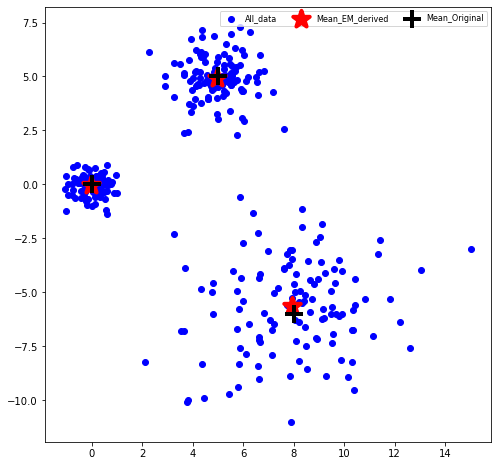

In [748]:
################################# E-M Algo for Q2 #################################

# Generating Synthetic 2D data
mean_vec = np.array([[0,0],[5,5],[8,-6]])
sigma_vec = np.array([0.5,1,2])
num_vec = np.array([100,110,120])
tot = np.sum(num_vec)
X = generate_2d_gaussdata(3, mean_vec, sigma_vec, num_vec)
np.random.shuffle(X) # shuffling the data

# Defining Known values
n_iter = 70
pi_k = np.array([num_vec[0]/tot,num_vec[1]/tot,num_vec[2]/tot])

# Initializing Mean and Variance to some random value
mu_init = np.array([[1,2], [4,5], [-4,5]])
sig_arr_init = np.array([1,1,1])
# E-M Algo as per derivation in Solution 2a
q_mat, mu_mat, sig_arr = EM_algo(pi_k, mu_init, sig_arr_init, X, n_iter)

mu_mat =   np.round(mu_mat*1000)/1000
sig_arr =   np.round(sig_arr*1000)/1000

# Printing output of E-M algorithm

print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("The original Mean values using which the synthetic data was created. \n")
print(mean_vec[0,:],", ",mean_vec[1,:],", ",mean_vec[2,:])
print("The output Mean values from EM Algorithm. \n")
print(mu_mat[2,:],", ",mu_mat[1,:],", ",mu_mat[0,:])
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("The original Variance values using which the synthetic data was created. \n")
print(sigma_vec[0],", ",sigma_vec[1],", ",sigma_vec[2])
print("The output Mean values from EM Algorithm. \n")
print(sig_arr[2],",",sig_arr[1],",",sig_arr[0])
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("The Cluster Mean and Variance has thus converged well demonstrating the correctness of derivation in Solution 2a\n")

print("Note: The sequence of cluter mean or variance may differ for original and derived case\n")
# Plotting
plt.figure(figsize=(8, 8))
all_data = plt.scatter(X[:,0], X[:,1], c='blue')
Mean_EM = plt.scatter(mu_mat[:,0], mu_mat[:,1], c='red', s=300, marker='*', linewidths=4, )
Mean_Orig = plt.scatter(mean_vec[:,0], mean_vec[:,1], c='black', s=300, marker='+', linewidths=4, )
plt.legend((all_data, Mean_EM, Mean_Orig),
           ('All_data', 'Mean_EM_derived', 'Mean_Original'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.show()